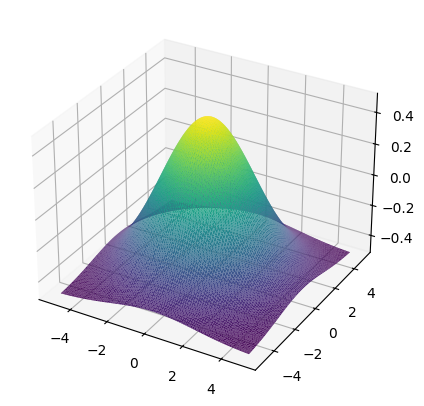

In [1]:
import matplotlib.pyplot as plt
from tools import generate_gaussian_data

X, y = generate_gaussian_data(10000)

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X.T[0], X.T[1], y.T.ravel(), cmap='viridis')
plt.show()

### 1. Vary the number of nodes in the hidden layer from 1 to 25 (every few) and try to observe any trends. What happens when you have very few (less than 5) or very many (more than 20) hidden nodes? Can you explain your observations? Try to make a model comparison - what error estimates and how would you compare them to identify the ”best” model?

In [2]:
from tools import (
    ModelResult, load_MLP_regressor, split_dataset, evaluate
)

n_epochs = 10
models = {}

for i in range(1,26): 
    model = load_MLP_regressor(n_nodes=i)
    print(f"\nTraining network with n_nodes = {i}")
    
    X_train, X_val, y_train, y_val = split_dataset(X, y)
    model.fit(X_train, y_train, epochs=n_epochs, verbose=0)

    mse_train, mse_val, mse_overall = evaluate(
        model, X, y, X_train, X_val, y_train, y_val
    )
    print(f"MSE Train: {mse_train:.5f} \nMSE Val: {mse_val:.5f} \mMSE Overall: {mse_overall:.5f}")
    models[i] = ModelResult(
        model=model,
        mse_train=mse_train, 
        mse_val=mse_val, 
        mse_overall=mse_overall
    )

c:\SUTD\KTH\DD2437 Artificial Neural Networks and Deep Architectures\Code\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training network with n_nodes = 1
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - loss: 0.0758
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - loss: 0.0430
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - loss: 0.0585
MSE Train: 0.04463 
MSE Val: 0.08822 \mMSE Overall: 0.07079

Training network with n_nodes = 2
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 0.0758
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - loss: 0.0430
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - loss: 0.0585
MSE Train: 0.04463 
MSE Val: 0.08822 \mMSE Overall: 0.07079

Training network with n_nodes = 3
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0494
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - loss: 1.3074
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - loss: 1.0047
MSE Train: 0.02698 
MSE Val: 0.70704 \mMSE Overall: 0.43502

Training network with n_nodes = 4
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - loss: 0.0668
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - loss: 1.7959
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step -

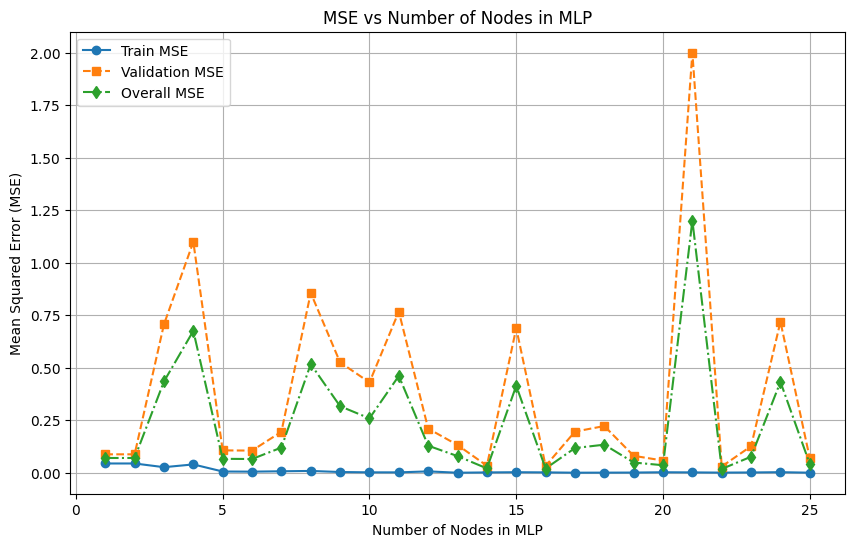

In [3]:
from tools import plot_mse_results
nodes = list(range(1, 26, 1))
list_mse_train = [models[i].mse_train for i in nodes]
list_mse_val = [models[i].mse_val for i in nodes]
list_mse_overall = [models[i].mse_overall for i in nodes]

plot_mse_results(
    x_axis="nodes",
    list_mse_train=list_mse_train,
    list_mse_val=list_mse_val,
    list_mse_overall=list_mse_overall
)

### 2. For the selected ”best” model, run experiments with varying number of the training samples, e.g. from 80% down to 20% of all the dataset.

We choose the model with 8 nodes for the following reasons: 
1. Based on the elbow method, between 5 to 10 nodes seems like an optimal choice that balances between overfitting and underfitting. 
2. 6 nodes is chosen because there is a low distance between the training and validation MSE, indicating a well-balanced model.

In [6]:
model_results = {}

for i in range(20, 81, 10): 
    training_fraction = i / 100 
    model = load_MLP_regressor(n_nodes=6)
    print(f"Training network with n_nodes = {i} and training fraction: {training_fraction}")

    X_train, X_val, y_train, y_val = split_dataset(X, y)
    model.fit(X_train, y_train, epochs=n_epochs, verbose=0)

    mse_train, mse_val, mse_overall = evaluate(
        model, X, y, X_train, X_val, y_train, y_val
    )
    print(f"MSE Train: {mse_train:.5f} \nMSE Val: {mse_val:.5f} \mMSE Overall: {mse_overall:.5f}")
    model_results[i] = ModelResult(
        model=model,
        mse_train=mse_train, 
        mse_val=mse_val, 
        mse_overall=mse_overall
    )

Training network with n_nodes = 20 and training fraction: 0.2
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss: 0.0064
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - loss: 0.1024
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 0.0805
MSE Train: 0.00428 
MSE Val: 0.06076 \mMSE Overall: 0.03817
Training network with n_nodes = 30 and training fraction: 0.3
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - loss: 0.0017
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - loss: 0.8525
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 0.6469
MSE Train: 0.00111 
MSE Val: 0.44187 \mMSE Overall: 0.26557
Training network with n_nodes = 40 and training fraction: 0.4
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - loss: 0.0049
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - loss: 0.2237
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - loss: 0.1827
MSE Train: 0.00368 
MSE Val: 0.15747 \mMSE Overall: 0.09596
Training network with n_nodes = 50 and training fraction: 0.5
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - loss:

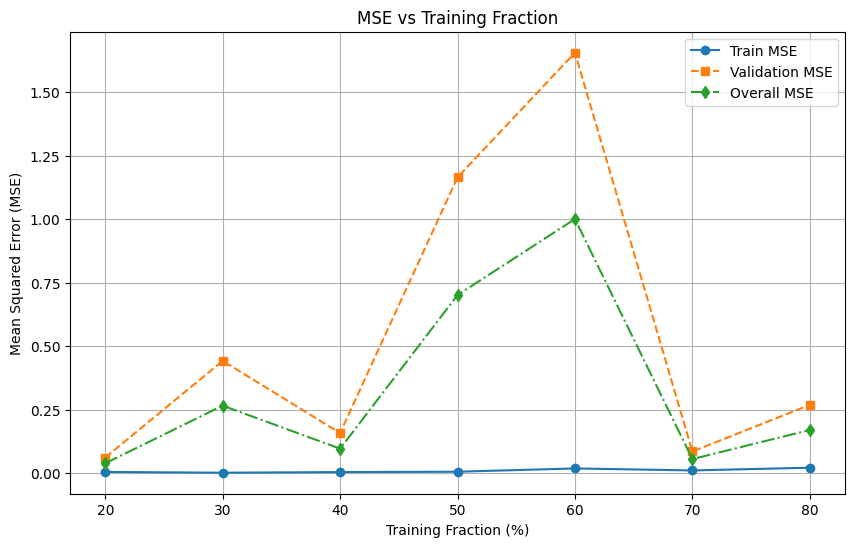

In [8]:
training_fractions = list(range(20, 81, 10))
list_mse_train = [model_results[i].mse_train for i in training_fractions]
list_mse_val = [model_results[i].mse_val for i in training_fractions]
list_mse_overall = [model_results[i].mse_overall for i in training_fractions]

plot_mse_results(
    x_axis="training_fraction",
    list_mse_train=list_mse_train,
    list_mse_val=list_mse_val,
    list_mse_overall=list_mse_overall
)

### 3. For the ”best” model, can you speed up the convergence without compromising the generalisation performance?